## API 

* Une API (Application Programming Interface) est un ensemble de règles permettant à deux applications distinctes de communiquer entre elles et d’échanger des données.
* Elle agit comme une interface entre des données existantes et un programme indépendant, évitant ainsi de redévelopper entièrement une application pour y intégrer de nouvelles informations.

* Les API sont essentielles pour permettre à différentes applications ou systèmes de partager des données ou des fonctionnalités, que ce soit au sein d’une entreprise ou avec des services externes.

* Elles facilitent l’intégration de services tiers, comme les passerelles de paiement ou les plateformes de cartographie, dans des applications existantes.

### Objectifs:

Développer une API RESTful en Python (Flask ou FastAPI) pour exposer la base de connaissance à une application (ex. : chatbot).




In [9]:
# Importer les dépendances
from fastapi import FastAPI, Depends, HTTPException
import sqlite3
from fastapi import FastAPI, HTTPException
from fastapi.responses import JSONResponse
import nest_asyncio
import uvicorn

### Créer une API et exploiter une base de connaissance

In [23]:
# Pour exécuter FastAPI dans un notebook
nest_asyncio.apply()

app = FastAPI()
DATABASE_URL = "data.db"

# Connexion à SQLite avec accès multi-thread
def get_db():
    try:
        db = sqlite3.connect(DATABASE_URL, check_same_thread=False)
        db.row_factory = sqlite3.Row
        return db
    except Exception as e:
        print("Erreur de connexion à la base :", e)
        raise HTTPException(status_code=500, detail="Erreur base de données")

@app.get("/")
async def root():
    return {"message": "Hello World!"}

@app.get("/viewresults", response_class=JSONResponse)
async def viewresults():
    try:
        db = get_db()
        cursor = db.execute("SELECT id, name, location FROM users")
        results = cursor.fetchall()
        db.close()
        result_list = [dict(row) for row in results]
        return JSONResponse(content=result_list)
    except Exception as e:
        print("Erreur dans /viewresults :", e)
        raise HTTPException(status_code=500, detail="Erreur serveur interne")

# Lancer FastAPI depuis un notebook
uvicorn.run(app, host="127.0.0.1", port=4000)

INFO:     Started server process [2644]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:4000 (Press CTRL+C to quit)


INFO:     127.0.0.1:58154 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:58155 - "GET /viewresults HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [2644]


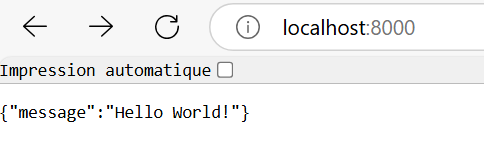

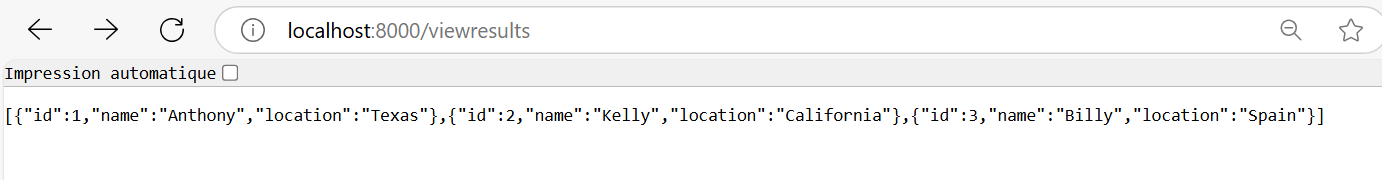

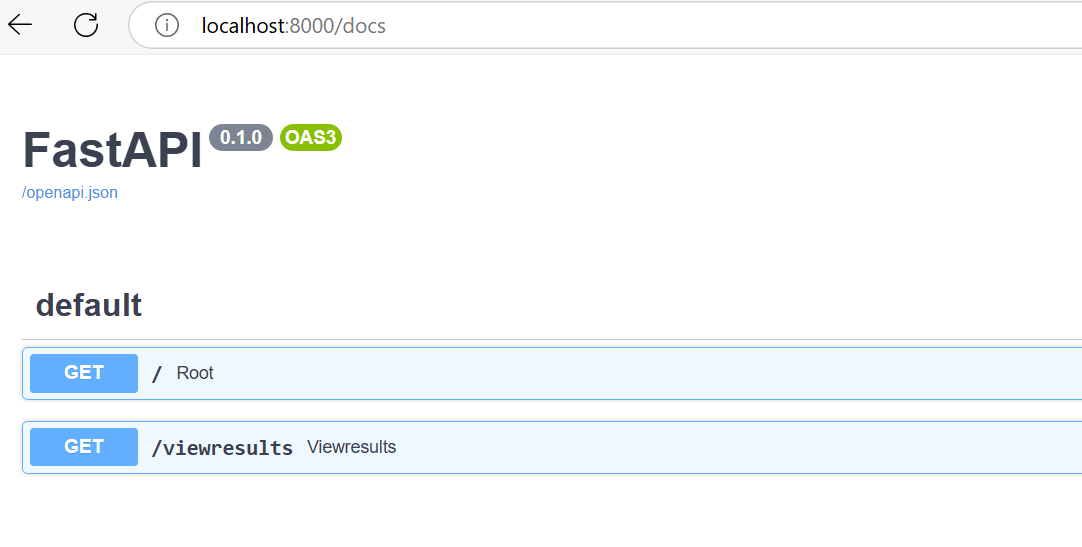

In [15]:
def get_db():
    conn = sqlite3.connect('data.db')  # remplace par le bon chemin
    conn.row_factory = sqlite3.Row        # facultatif : permet d'accéder aux colonnes par nom
    return conn
db = get_db()
cur = db.execute('SELECT id, name, location FROM users')
results = cur.fetchall()

for row in results:
    print(dict(row))  # si tu as activé row_factory, sinon juste: print(row)



{'id': 1, 'name': 'Anthony', 'location': 'Texas'}
{'id': 2, 'name': 'Kelly', 'location': 'California'}
{'id': 3, 'name': 'Billy', 'location': 'Spain'}


## Se connecter à une BDD MongoDB




In [ ]:
#pip install fastapi pymongo uvicorn

In [24]:
from fastapi import FastAPI, HTTPException
from fastapi.responses import JSONResponse
from pymongo import MongoClient
import uvicorn


Task was destroyed but it is pending!
task: <Task pending name='Task-42' coro=<LifespanOn.main() running at C:\Users\manel\miniconda3\lib\site-packages\uvicorn\lifespan\on.py:88> wait_for=<Future pending cb=[Task.__wakeup()]>>
ERROR:    Traceback (most recent call last):
  File "C:\Users\manel\miniconda3\lib\site-packages\starlette\routing.py", line 686, in lifespan
    await receive()
GeneratorExit

C:\Users\manel\miniconda3\lib\site-packages\pycparser\c_parser.py:316: RuntimeWarning: coroutine 'Server.serve' was never awaited
  for tn in typename:


In [30]:

# Connexion MongoDB

client = MongoClient("mongodb://localhost:27017")
db = client["tickets_support"]
collection = db["tickets"]

# FastAPI app
app = FastAPI()

def serialize_ticket(ticket):
    ticket["_id"] = str(ticket["_id"])
    return ticket

# Endpoint de base
@app.get("/")
def read_root():
    return {"message": "Bienvenue dans l'API des tickets clients"}

# Tous les tickets
@app.get("/tickets")
def get_all_tickets():
    tickets = list(collection.find())
    return [serialize_ticket(t) for t in tickets]

# Un ticket par ID Mongo (ObjectId)
@app.get("/ticket/{ticket_id}")
def get_ticket_by_id(ticket_id: int):
    ticket = collection.find_one({"ticket_id": ticket_id})
    if ticket:
        ticket["_id"] = str(ticket["_id"])  # Convertir ObjectId en chaîne pour la sérialisation JSON
        return ticket
    else:
        raise HTTPException(status_code=404, detail="Ticket non trouvé")

# Tous les tickets d’une catégorie donnée
@app.get("/tickets/categorie/{categorie}")
def get_tickets_by_category(categorie: str):
    tickets = list(collection.find({"categorie": categorie}))
    return [serialize_ticket(t) for t in tickets]



# Lancer FastAPI depuis un notebook
uvicorn.run(app, host="127.0.0.1", port=4000)

INFO:     Started server process [2644]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:4000 (Press CTRL+C to quit)


INFO:     127.0.0.1:59966 - "GET /tickets HTTP/1.1" 200 OK
INFO:     127.0.0.1:59966 - "GET /ticket/1 HTTP/1.1" 200 OK
INFO:     127.0.0.1:60054 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:60054 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [2644]


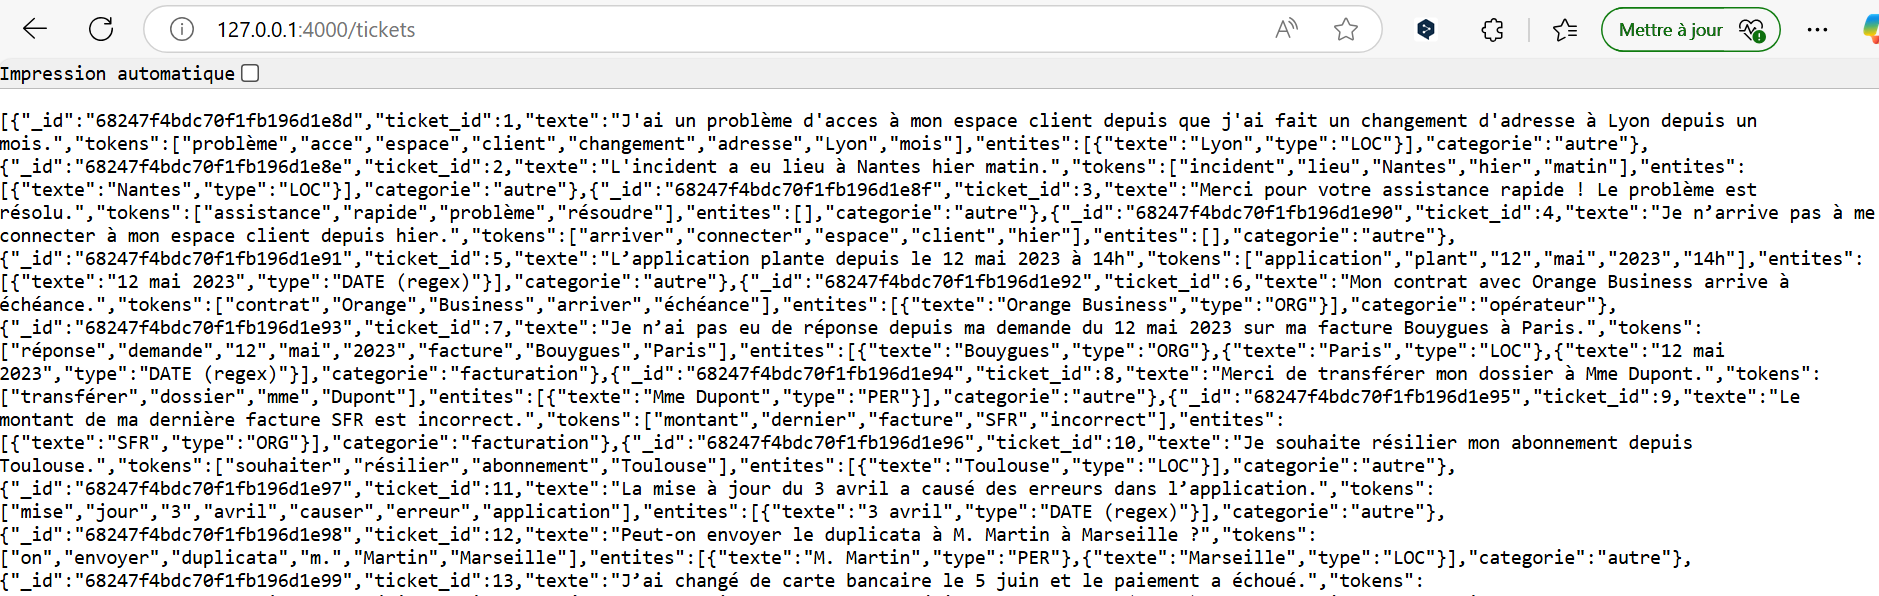

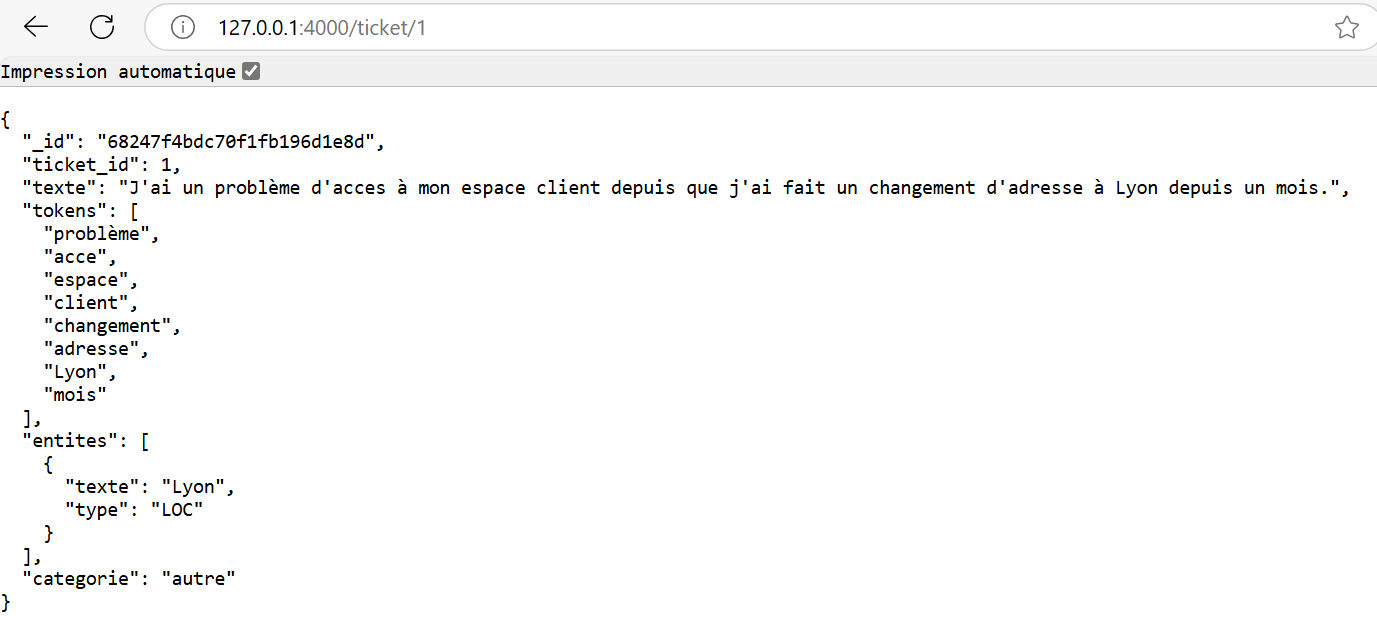

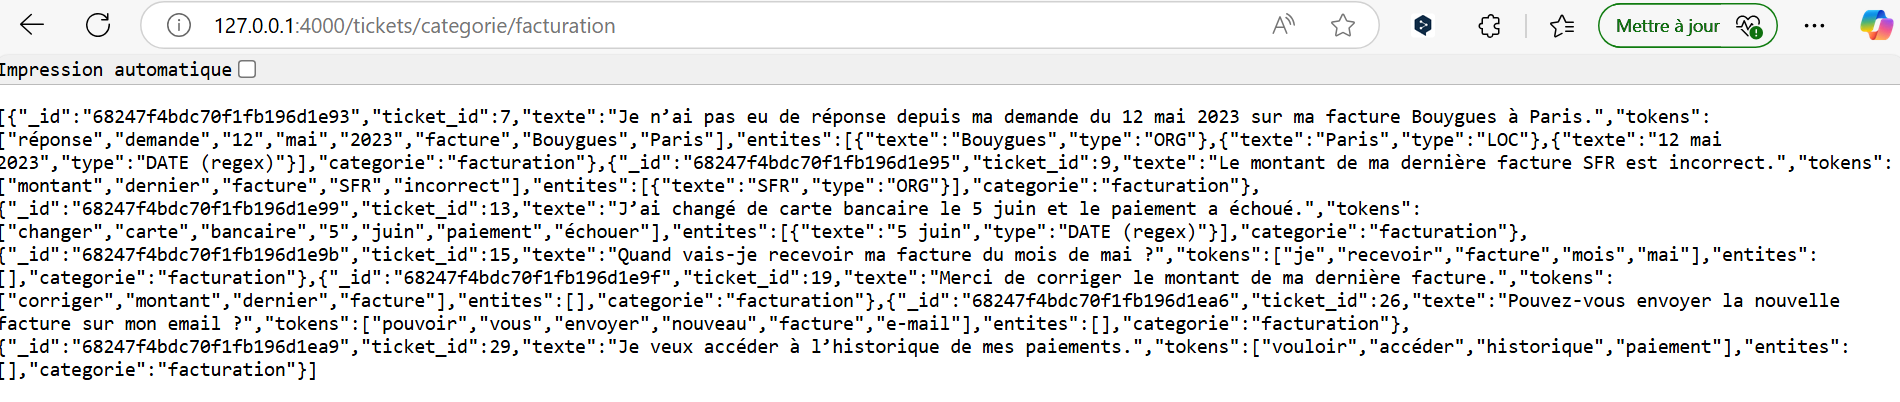

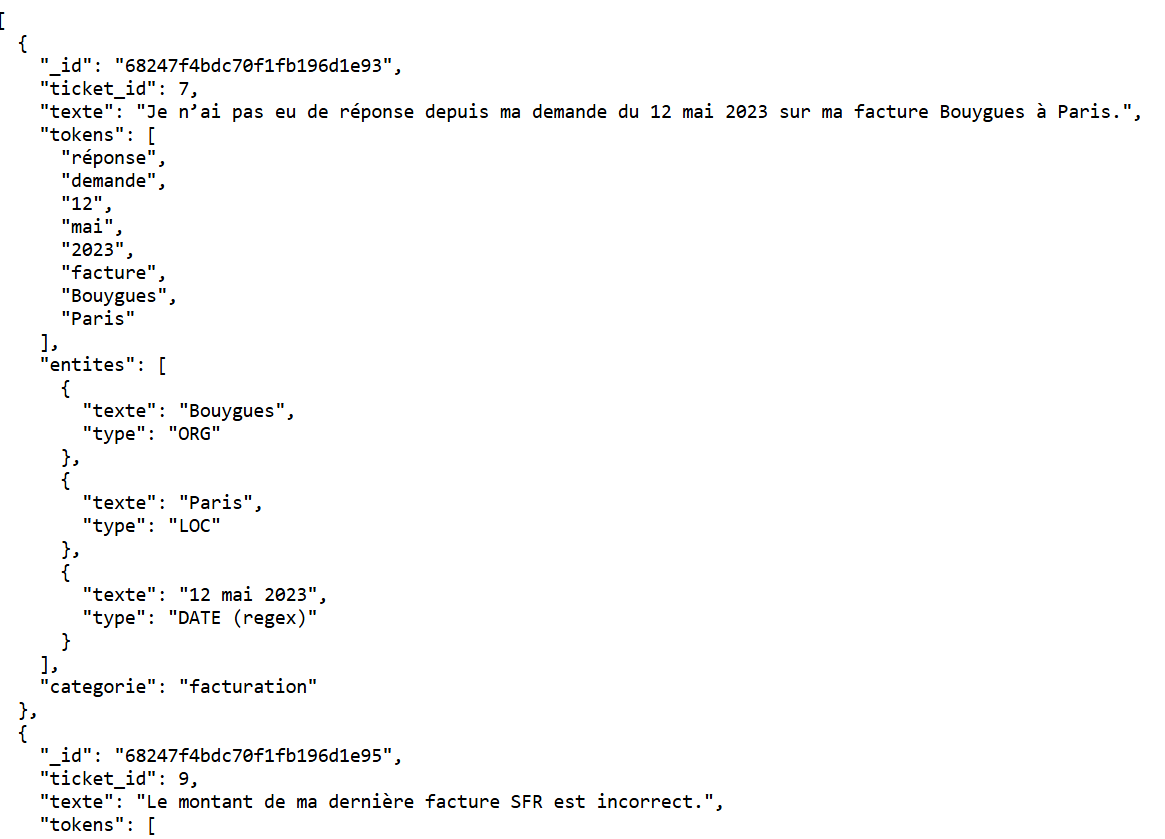

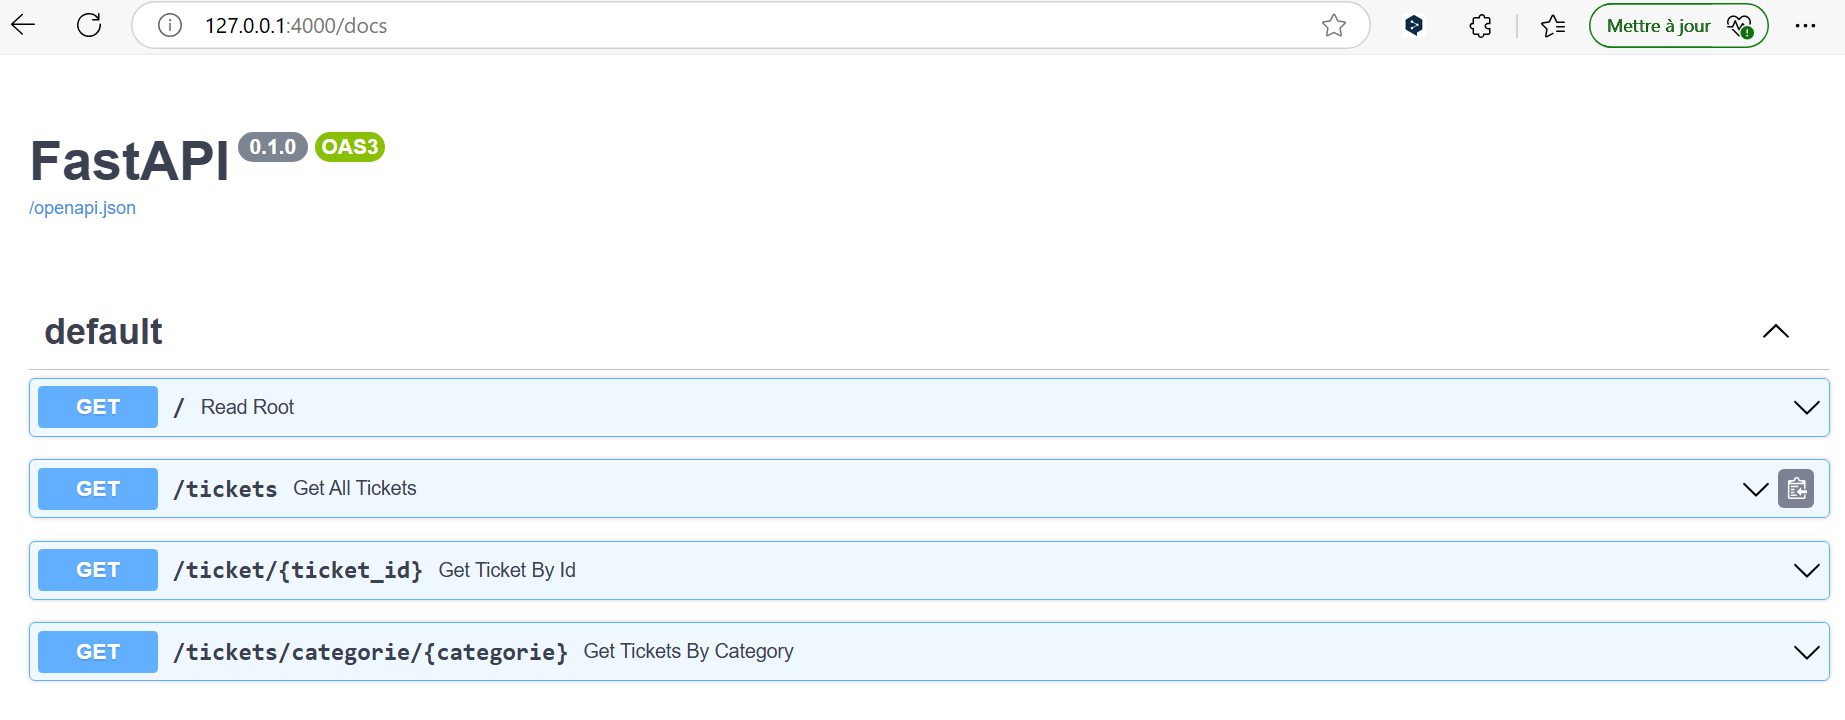

### Créer un script pour interagir avec l'utilisateur :



* Recherche par identifiant de ticket
* Quels sont les tickets concernant Lyon ?
* Montre-moi les tickets du 12 mai 2023.
* Quels sont les tickets liés à la facturation ?
